<a href="https://colab.research.google.com/github/pavann-chowdary/gitlearning/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT LIB'S
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import tweepy
from wordcloud import WordCloud
from textblob import TextBlob
plt.style.use('fivethirtyeight')


In [48]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [20]:
#UPLOAD FILE
from google.colab import files
Apikeys=files.upload()

Saving TwitterApikeys.csv to TwitterApikeys.csv


In [25]:
#GET KEYS FROM FILE
ApiKeys=pd.read_csv('TwitterApikeys.csv')
ConsumerKey=ApiKeys['ApiKey'][0]
ConsumerSecretKey=ApiKeys['ApiSecretKey'][0]
AccessToken=ApiKeys['AccessToken'][0]
AccessSecretToken=ApiKeys['AccessSecretToken'][0]

In [27]:
#CREATE AUTHENTICATION OBJECT
auth=tweepy.OAuthHandler(ConsumerKey,ConsumerSecretKey)
#SET ACCESSTOKEN AND ACCESSSECRETTOKEN
auth.set_access_token(AccessToken,AccessSecretToken)
#CREATE API OBJECT WHILE PASSING AUTHENTICATION INFORMATION
api=tweepy.API(auth,wait_on_rate_limit=True)

In [99]:
#EXTRACT 100 TWEETS FROM TWITTER USER
tweets=api.user_timeline(screen_name="KamalaHarris",count=100,lang='en',tweet_mode='extended')
#printing 3 tweets
c=0
print(color.BOLD + color.DARKCYAN+ 'Recent 3 Tweets Of @KamalaHarris'+ color.END)
for tweet in tweets[0:3]:
    c+=1
    print(c,')',tweet.full_text,end='\n')

Recent 3 Tweets Of @KamalaHarris
1 ) From the pandemic to our climate crisis, this past year reaffirmed the importance of listening to experts. Watch live as @JoeBiden and I introduce the qualified scientists to lead our science team. https://t.co/0FXPtXJNXz
2 ) The Biden-Harris COVID-19 response plan will include:
✓Setting up community vaccination sites nationwide
✓Scaling up testing and tracing
✓Providing paid sick leave to contain spread of the virus
✓Addressing health disparities
3 ) This year, join @JoeBiden and me for a National Day of Service on January 18th to help build our country back better.

Go to https://t.co/VPaoxS1YHk to find an event in your community or learn more about how to host your own. https://t.co/uLYibK5XDj


In [100]:
#PUT THE TWEETS IN DATA FRAME
data=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['TWEETS'])
data.head(3)

,TWEETS
0,"From the pandemic to our climate crisis, this ..."
1,The Biden-Harris COVID-19 response plan will i...
2,"This year, join @JoeBiden and me for a Nationa..."


In [110]:
#TEXT CLEANING
def txtclean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text)#REMOVE MENTIONS
    text=re.sub(r'#','',text)#REMOVE HASHTAGS
    text=re.sub(r'RT[\s]+','',text)#REMOVE RETWEETS
    text=re.sub(r'https://\S+','',text)#REMOVE HYPERLINKS
    return text


In [116]:
#APPLYING TEXTCLEANING
data['TWEETS']=data['TWEETS'].apply(txtclean)
data

,TWEETS
0,"From the pandemic to our climate crisis, this ..."
1,The Biden-Harris COVID-19 response plan will i...
2,"This year, join and me for a National Day of ..."
3,These world-renowned scientists and experts re...
4,"Dr. Martin Luther King, Jr. understood that ra..."
...,...
95,"Getting the COVID-19 vaccine was safe, easy, a..."
96,: The polls are open.
97,: There are just TWO DAYS left to vote early.
98,On the frontlines of this fight are nurses lik...


In [123]:
#GETTING SUBJECTIVITY AND POLARITY OF EACH TWEET
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity
#ASSIGN SUBJECTIVITY AND POLARITY TO EACH TWEET IN DATA FRAME
data['SUBJECTIVITY']=data['TWEETS'].apply(get_subjectivity)
data['POLARITY']=data['TWEETS'].apply(get_polarity)
data

,TWEETS,SUBJECTIVITY,POLARITY
0,"From the pandemic to our climate crisis, this ...",0.375000,-0.056818
1,The Biden-Harris COVID-19 response plan will i...,0.857143,-0.714286
2,"This year, join and me for a National Day of ...",0.500000,0.400000
3,These world-renowned scientists and experts re...,0.494667,0.580000
4,"Dr. Martin Luther King, Jr. understood that ra...",0.162500,0.100000
...,...,...,...
95,"Getting the COVID-19 vaccine was safe, easy, a...",0.777778,0.394444
96,: The polls are open.,0.500000,0.000000
97,: There are just TWO DAYS left to vote early.,0.150000,0.050000
98,On the frontlines of this fight are nurses lik...,0.000000,0.000000


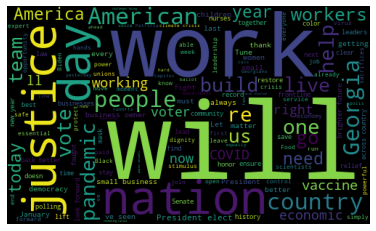

In [140]:
#WORD CLOUD OF ALL THE TWEETS
alltweets=' '.join([t for t in data['TWEETS']])
wrdcld=WordCloud(width=500,height=300).generate(alltweets)
plt.imshow(wrdcld)
plt.axis('off')
plt.show()

In [144]:
#ANALYSIS BASED ON POLARITY OF TWEET
def Analysis(polarity_score):
    if polarity_score>0:
        return 'Positive'
    elif polarity_score<0:
        return 'Negative'
    else:
        return 'Neutral'
#ASSIGN ANALYSIS TO EACH TWEET IN DATA FRAME
data['ANALYSIS']=data['POLARITY'].apply(Analysis)
data

,TWEETS,SUBJECTIVITY,POLARITY,ANALYSIS
0,"From the pandemic to our climate crisis, this ...",0.375000,-0.056818,Negative
1,The Biden-Harris COVID-19 response plan will i...,0.857143,-0.714286,Negative
2,"This year, join and me for a National Day of ...",0.500000,0.400000,Positive
3,These world-renowned scientists and experts re...,0.494667,0.580000,Positive
4,"Dr. Martin Luther King, Jr. understood that ra...",0.162500,0.100000,Positive
...,...,...,...,...
95,"Getting the COVID-19 vaccine was safe, easy, a...",0.777778,0.394444,Positive
96,: The polls are open.,0.500000,0.000000,Neutral
97,: There are just TWO DAYS left to vote early.,0.150000,0.050000,Positive
98,On the frontlines of this fight are nurses lik...,0.000000,0.000000,Neutral


In [184]:
#ALL POSITIVE TWEETS 
sorted_data=data.sort_values(by='POLARITY')
c_negative=data['ANALYSIS'].value_counts()['Negative']
c_neutral=data['ANALYSIS'].value_counts()['Neutral']

#when sorted 1st -ve then 0 then +ve so print excluding -ve and 0 to end of df gives +ve
positive_tweets=sorted_data[c_negative+c_neutral:sorted_data.shape[0]]
positive_tweets['TWEETS']
#same way we can do for negative and neutral tweets

38    We are still in the middle of a pandemic: mask...
36    My mother taught me that no matter how you ear...
92    : Georgia — Today is your last chance to vote ...
35    What the headline doesn't tell you: this dispr...
97       : There are just TWO DAYS left to vote early. 
64    I know  and . We’ve talked about the promise o...
23    : I urge every American to:\n\n- Wear a mask\n...
32    From the pandemic, to the economic recession, ...
22    We’ve seen the devastation the climate crisis ...
52    We have witnessed two systems of justice: one ...
12    I’m with . Our first priority has to be to get...
17    Food banks are strained trying to feed people ...
91    As we bring 2020 to a close,  and I wanted to ...
50    The challenge we’re facing in our country is a...
14    : We’re in the teeth of this crisis, and we ne...
40    From working with unions as San Francisco’s Di...
99    Getting the COVID-19 vaccine will save your li...
4     Dr. Martin Luther King, Jr. understood tha

In [190]:
#other way
ptweets=data[data.ANALYSIS=='Positive']
ptweets['TWEETS']

2     This year, join  and me for a National Day of ...
3     These world-renowned scientists and experts re...
4     Dr. Martin Luther King, Jr. understood that ra...
5     : 5 days until we make history.\n\n❤️ or 🔁 thi...
6     Happy Founders’ Day, ! Today, as we celebrate ...
9     “We will finish the job of getting a total of ...
11    There is no one better prepared than  to steer...
12    I’m with . Our first priority has to be to get...
13    More than 384,000 Americans have died from COV...
14    : We’re in the teeth of this crisis, and we ne...
16    One of the most pressing challenges facing our...
17    Food banks are strained trying to feed people ...
18    Like our son Cole, I often find myself thinkin...
22    We’ve seen the devastation the climate crisis ...
23    : I urge every American to:\n\n- Wear a mask\n...
24    The first 100 days of the Biden-Harris adminis...
26    Thank you Governor  for your powerful message ...
27    We must build our economy back better so i

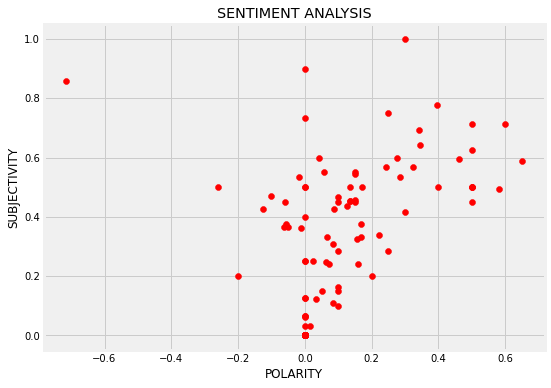

In [188]:
#plot subjectivity vs polarity
plt.figure(figsize=(8,6))
for i in range(0,data.shape[0]):
    plt.scatter(data['POLARITY'][i],data['SUBJECTIVITY'][i],color='red')
plt.ylabel('SUBJECTIVITY')
plt.xlabel('POLARITY')
plt.title('SENTIMENT ANALYSIS')
plt.show()

In [195]:
# %of +ve tweets
round((ptweets.shape[0]/data.shape[0]*100),1)

55.0

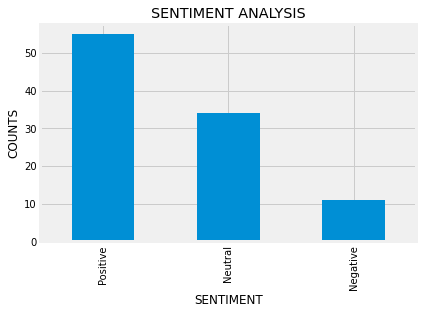

In [198]:
#plot of -ve and +ve and neutral no.of tweets
data['ANALYSIS'].value_counts().plot(kind='bar')
plt.title('SENTIMENT ANALYSIS')
plt.xlabel('SENTIMENT')
plt.ylabel('COUNTS')
plt.show()